In [5]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/PC"

Mounted at /content/drive
'2020-06-29 19-53-29-1.m4v'   BLINK.mp4      'simply open Cv.pdf'   train
 Assignment_Noran.rar	      Hardware.pptx   test


In [6]:
import os
barrel_dir_train = os.path.join('/content/drive/MyDrive/PC/train')
barrel_dir_test =  os.path.join('/content/drive/MyDrive/PC/test')


In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image

In [8]:
print(barrel_dir_train)
print(barrel_dir_test)

/content/drive/MyDrive/PC/train
/content/drive/MyDrive/PC/test


In [9]:
print('total training images:', len(os.listdir(barrel_dir_train)))
print('total testing images:', len(os.listdir(barrel_dir_test)))

total training images: 1
total testing images: 1


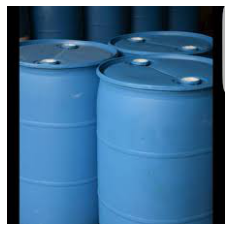

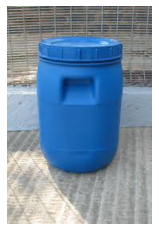

In [10]:
img = mpimg.imread(barrel_dir_train+'/train' +'/images (1).jpg')
plt.imshow(img)
plt.axis('Off')
plt.show()
img = mpimg.imread(barrel_dir_train+'/train' +'/images (10).jpg')
plt.imshow(img)
plt.axis('Off')
plt.show()

In [11]:
TRAINING_DIR = barrel_dir_train
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
print(TRAINING_DIR)
train_generator = training_datagen.flow_from_directory(
	barrel_dir_train,
	target_size=(150,150),
	class_mode='categorical',
    batch_size=50
)

/content/drive/MyDrive/PC/train
Found 23 images belonging to 1 classes.


In [12]:
VALIDATION_DIR = barrel_dir_test
validation_datagen = ImageDataGenerator(rescale = 1./255)



validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=50
)

Found 23 images belonging to 1 classes.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, validation_data = validation_generator, verbose = 1)

#model.save("barrel.h5")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      